# Download TextVQA Dataset

In [ ]:
# commit ad32366285a804cf7694749960924335826a21c6
# Author: Vedanuj Goswami <vedanujg@gmail.com>
# Date:   Tue Jun 2 17:53:40 2020 -0700

#     [chores] Update project readme files (#286)
    
#     Summary:
#     - Add project Readme for MMBT
#     - Update BAN, BUTD, Lorra, Pythia, Vilbert, Visual BERT readme files
#     Pull Request resolved: https://github.com/facebookresearch/mmf/pull/286
    
#     Reviewed By: apsdehal
    
#     Differential Revision: D21835976
    
#     Pulled By: vedanuj
    
#     fbshipit-source-id: 10125790ffe4d7f70fa6a2a9648e3fa605a312ab

## TextVQA 0.5

In [ ]:
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_test.json
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_val.json
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_train.json

--2021-02-16 09:40:19--  https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_test.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13582003 (13M) [text/plain]
Saving to: ‘TextVQA_0.5_test.json’

TextVQA_0.5_test.js 100%[===================>]  12.95M  13.9MB/s    in 0.9s    

2021-02-16 09:40:20 (13.9 MB/s) - ‘TextVQA_0.5_test.json’ saved [13582003/13582003]

--2021-02-16 09:40:20--  https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_val.json
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 104.22.75.142, 104.22.74.142, 172.67.9.4, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|104.22.75.142|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15782960 (15M) [text/plain]
Saving to: ‘TextVQA_0.5_val.json’

TextVQA_0.5_

## TextVQA 0.5.1

In [ ]:
# !wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5.1_test.json
# !wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5.1_val.json
# !wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5.1_train.json

# import libraries

In [ ]:
# load data
import json

import numpy as np
import pandas as pd

# visualization
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

from PIL import Image
from io import BytesIO
from IPython.display import display

from pprint import pprint

# networking
import requests
import urllib

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# drive.flush_and_unmount() # cb2c3d0c26e44553

# Load Validation dataset

In [ ]:
valid_data = pd.read_json('TextVQA_0.5_val.json')
valid_data = pd.json_normalize(valid_data['data'])
valid_data.head()

question  ... set_name
0               what is the brand of this camera?  ...      val
1           what does the small white text spell?  ...      val
2                      what kind of beer is this?  ...      val
3              what brand liquor is on the right?  ...      val
4  how long has the drink on the right been aged?  ...      val

[5 rows x 13 columns]

In [ ]:
valid_data.shape

(5000, 13)

ERROR

```
Traceback (most recent call last):
  File "/opt/conda/envs/conda36env/bin/mmf_run", line 33, in <module>
    sys.exit(load_entry_point('mmf', 'console_scripts', 'mmf_run')())
  File "/home/joseph/mmf/mmf_cli/run.py", line 89, in run
    main(configuration, predict=predict)
  File "/home/joseph/mmf/mmf_cli/run.py", line 40, in main
    trainer.train()
  File "/home/joseph/mmf/mmf/trainers/base_trainer.py", line 246, in train
    for batch in self.train_loader:
  File "/opt/conda/envs/conda36env/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 345, in __next__
    data = self._next_data()
  File "/opt/conda/envs/conda36env/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 856, in _next_data
    return self._process_data(data)
  File "/opt/conda/envs/conda36env/lib/python3.6/site-packages/torch/utils/data/dataloader.py", line 881, in _process_data
    data.reraise()
  File "/opt/conda/envs/conda36env/lib/python3.6/site-packages/torch/_utils.py", line 395, in reraise
    raise self.exc_type(msg)
KeyError: Caught KeyError in DataLoader worker process 0.
Original Traceback (most recent call last):
  File "/home/joseph/mmf/mmf/datasets/databases/readers/feature_readers.py", line 202, in _load
    image_id = int(split.split("_")[-1])
ValueError: invalid literal for int() with base 10: 'train/cb2c3d0c26e44553'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/conda/envs/conda36env/lib/python3.6/site-packages/torch/utils/data/_utils/worker.py", line 178, in _worker_loop
    data = fetcher.fetch(index)
  File "/opt/conda/envs/conda36env/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in fetch
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/envs/conda36env/lib/python3.6/site-packages/torch/utils/data/_utils/fetch.py", line 44, in <listcomp>
    data = [self.dataset[idx] for idx in possibly_batched_index]
  File "/opt/conda/envs/conda36env/lib/python3.6/site-packages/torch/utils/data/dataset.py", line 207, in __getitem__
    return self.datasets[dataset_idx][sample_idx]
  File "/home/joseph/mmf/mmf/datasets/builders/textvqa/dataset.py", line 87, in __getitem__
    features = self.features_db[idx]
  File "/home/joseph/mmf/mmf/datasets/databases/features_database.py", line 89, in __getitem__
    return self.get(image_info)
  File "/home/joseph/mmf/mmf/datasets/databases/features_database.py", line 97, in get
    return self.from_path(feature_path)
  File "/home/joseph/mmf/mmf/datasets/databases/features_database.py", line 105, in from_path
    features, infos = self._get_image_features_and_info(path)
  File "/home/joseph/mmf/mmf/datasets/databases/features_database.py", line 78, in _get_image_features_and_info
    image_feats, infos = self._read_features_and_info(feat_file)
  File "/home/joseph/mmf/mmf/datasets/databases/features_database.py", line 63, in _read_features_and_info
    feature, info = feature_reader.read(feat_file)
  File "/home/joseph/mmf/mmf/datasets/databases/readers/feature_readers.py", line 79, in read
    return self.feat_reader.read(image_feat_path)
  File "/home/joseph/mmf/mmf/datasets/databases/readers/feature_readers.py", line 129, in read
    image_info = self._load(image_feat_path)
  File "/home/joseph/mmf/mmf/datasets/databases/readers/feature_readers.py", line 209, in _load
    img_id_idx = self.image_id_indices[image_id]
KeyError: b'train/cb2c3d0c26e44553'

```

In [ ]:
df = pd.read_json('TextVQA_0.5_train.json')
df = pd.json_normalize(df['data'])
df.head()
df[df['image_id'] == 'cb2c3d0c26e44553']

question          image_id  ... question_id set_name
34300  what country are the coins from?  cb2c3d0c26e44553  ...       34300    train
34301      what currency are the coins?  cb2c3d0c26e44553  ...       34301    train

[2 rows x 13 columns]

In [ ]:
df.shape

(34602, 13)

In [ ]:
valid_data.iloc[0]

question                               what is the brand of this camera?
image_id                                                003a8ae2ef43b901
image_classes          [Cassette deck, Printer, Medical equipment, Co...
flickr_original_url    https://farm2.staticflickr.com/4/5566811_bc00d...
flickr_300k_url        https://farm2.staticflickr.com/4/5566811_bc00d...
image_width                                                         1024
image_height                                                         664
answers                [nous les gosses, dakota, clos culombu, dakota...
ocr_tokens                [DAKOTA, DIGITAL, Single-Use, Camera, digrtal]
ocr_info               [{'word': 'DAKOTA', 'bounding_box': {'top_left...
question_tokens                 [what, is, the, brand, of, this, camera]
question_id                                                        34602
set_name                                                             val
Name: 0, dtype: object

In [ ]:
valid_data.iloc[0]['ocr_info'][0]

{'bounding_box': {'height': 0.071707926690578,
  'pitch': 0,
  'roll': 0,
  'rotation': 0,
  'top_left_x': 0.14370192587376,
  'top_left_y': 0.1531290858984,
  'width': 0.12223755568266,
  'yaw': 0.92349565029144},
 'word': 'DAKOTA'}

# Visualize

## Customised visualizer

In [ ]:
from skimage import io
from matplotlib import cm

def visualize(data, small_image=True):
    question   = data['question']
    image_id   = data['image_id']
    
    if small_image:
        url = data['flickr_300k_url']
    else:
        url = data['flickr_original_url']
    
    ocr_info   = data['ocr_info']
    ocr_tokens = data['ocr_tokens']

    print('Question:', question)

    if 'answers' in data:
        answers    = data['answers']
        print('Answers:', ',  '.join(answers))

    if 'answer' in data:
        pred_answer = data['answer']
        pred_source = data['pred_source']
        print('Predicted answer: ', pred_answer, ' <-----')
        print('Prediction source:', pred_source)

    try:
        image = io.imread(url)
    except:
        print('Image cannot be load')
        return

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    #image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)

    fontScale = 1
    fontFace  = cv2.FONT_HERSHEY_DUPLEX

    width, height, _ = image.shape
    for info, token in zip(ocr_info, ocr_tokens):

        color = cm.tab10(np.random.randint(10))
        color = 255 * np.array(color)
        color[3] = 125 

        box = info['bounding_box']
        x1 = int( box['top_left_x'] * height )
        y1 = int( box['top_left_y'] * width )
        w  = int( box['width']  * height )
        h  = int( box['height'] * width )

        x2, y2 = x1 + w, y1 + h
        
        # draw box
        cv2.rectangle(image, (x1,y1), (x2,y2), color, thickness=2)

        # text background
        text_width, text_height = cv2.getTextSize(token, fontFace, fontScale, thickness=2)[0]
        cv2.rectangle(image, (x1,y1), (x1+text_width,y1-text_height), color, cv2.FILLED)

        # put the text over the image 
        cv2.putText(image, token, (x1,y1),
                    fontFace, fontScale,
                    color=(255,255,255), thickness=1)
    cv2_imshow(image)

## Load the predcitions from M4C model on the validation

In [ ]:
!ls '/content/drive/MyDrive/projects/esther/TextVQA'
valid_prediction = pd.read_json(path+'/m4c_validation_textvqa_run_val_2020-06-08T18:08:48.json')
valid_prediction.head()

EstherAmmiProject.ipynb
m4c_textvqa_run_test_2020-06-05T12:35:31.json
m4c_validation_textvqa_run_val_2020-06-08T18:08:48.json
TextVQA_0.5.1_test.json
TextVQA_0.5.1_train.json
TextVQA_0.5.1_val.json
TextVQA_0.5_test.json
TextVQA_0.5_train.json
TextVQA_0.5_val.json
textvqa_run_test_2020-12-02T13:15:20.json
textvqa_run_val_2021-02-14T10:34:40.json


question_id          image_id        answer     pred_source
0        34602  003a8ae2ef43b901      polaroid         [VOCAB]
1        34603  b9dc400eb20bad64  royal palcon    [VOCAB, OCR]
2        34604  2b538a43dd933fc1      self ale      [OCR, OCR]
3        34605  831bcec304a17054      morangie           [OCR]
4        34606  831bcec304a17054      10 years  [VOCAB, VOCAB]

In [ ]:
path = '/content/drive/My Drive/projects/esther/TextVQA'
# valid_prediction = pd.read_json(path+'/m4c_validation_textvqa_run_val_2020-06-08T18:08:48.json')
valid_prediction = pd.read_json(path+'/textvqa_run_val_2021-02-14T10:34:40.json')
valid_prediction.head()

question_id          image_id         answer     pred_source
0        34602  003a8ae2ef43b901         pentax         [VOCAB]
1        34603  b9dc400eb20bad64         public         [VOCAB]
2        34604  2b538a43dd933fc1       pale ale  [VOCAB, VOCAB]
3        34605  831bcec304a17054  scotch whisky    [OCR, VOCAB]
4        34606  831bcec304a17054       10 years    [OCR, VOCAB]

#### Merge the predicted answer and the ground truth answer

In [ ]:
valid_result = pd.merge(valid_data, valid_prediction, on=['image_id', 'question_id'])
valid_result.head()

question  ...     pred_source
0               what is the brand of this camera?  ...         [VOCAB]
1           what does the small white text spell?  ...         [VOCAB]
2                      what kind of beer is this?  ...  [VOCAB, VOCAB]
3              what brand liquor is on the right?  ...    [OCR, VOCAB]
4  how long has the drink on the right been aged?  ...    [OCR, VOCAB]

[5 rows x 15 columns]

##Note
answers : ground truth  
answer : predicted

### Display the prediction

Data: 4437
Question: what two measurements can this cup measure?
Answers: 2 cups,  cups and oz,  cup and ounces,  cups and oz,  cups and oz,  cups oz,  cups, oz,  cups and oz,  cups, oz,  cups and ounces
Predicted answer:  12 x 12  <-----
Prediction source: ['VOCAB', 'VOCAB', 'VOCAB']


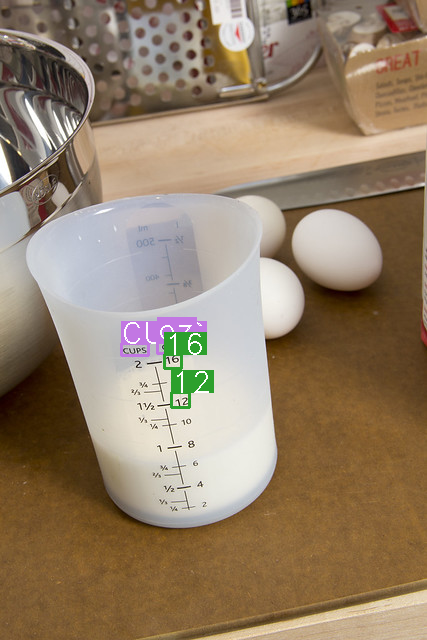




Data: 161
Question: what brand is the lunchbox?
Answers: stix,  stix,  stix,  stix,  stix,  stix,  stik,  pringles,  pringles ,  pringles stix
Predicted answer:  hbox  <-----
Prediction source: ['OCR']


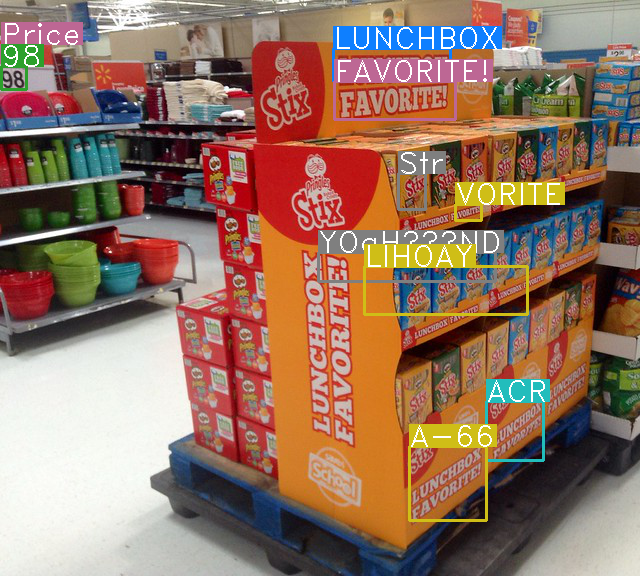




Data: 3663
Question: what number is on helicopter?
Answers: 852,  852,  852,  852,  852,  852,  852,  852,  852,  852
Predicted answer:  75  <-----
Prediction source: ['VOCAB']


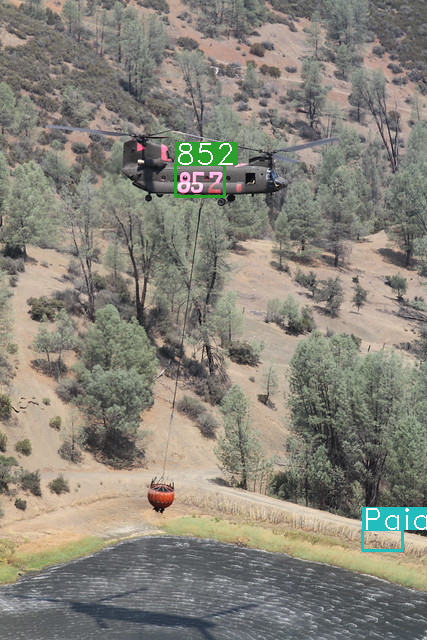




Data: 1615
Question: what time can you not turn left?
Answers: 7 am to 9 am, 4 pm to 7 pm,  7am-9am, 4pm-7pm,  7am-9am, 4pm-7pm,  7am-9am 4pm-7pm,  7am to 9am; 4pm to 7pm,  7am 9am 4pm 7pm,  7am-9am and 4pm-7pm,  7am-9am 4pm-7pm,  7-9am, 4-7pm,  7 am- 9 am and 4 pm- 7 pm
Predicted answer:  4pm  <-----
Prediction source: ['OCR']


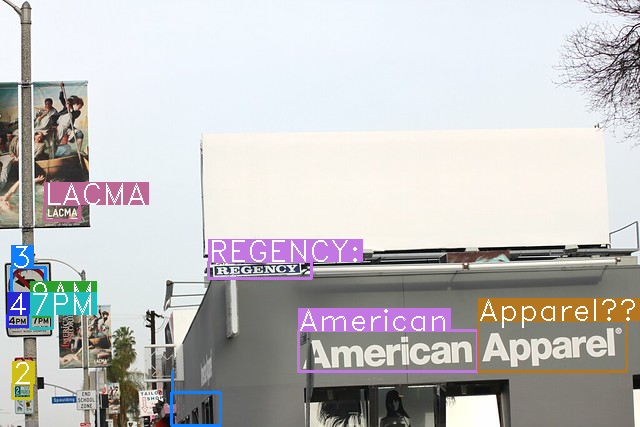




Data: 2125
Question: what time is it?
Answers: 11:59,  10:58 ,  10:59,  10:57,  11:59,  10:58,  10:58,  10:58,  10:58,  11:55
Predicted answer:  11:50  <-----
Prediction source: ['VOCAB']


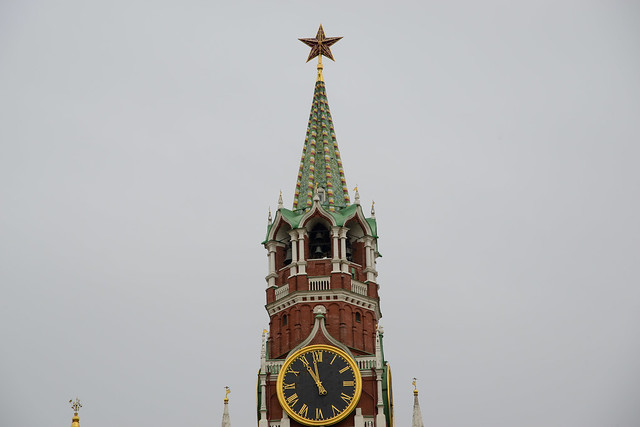




Data: 1590
Question: what animated film is being shown at the movie show?
Answers: wal-e,  wall-e,  elephants drems,  wall-e,  wall-e,  wall-e,  wall-e,  wall-e,  wall-e/antitrust,  wall-e
Predicted answer:  unanswerable  <-----
Prediction source: ['VOCAB']


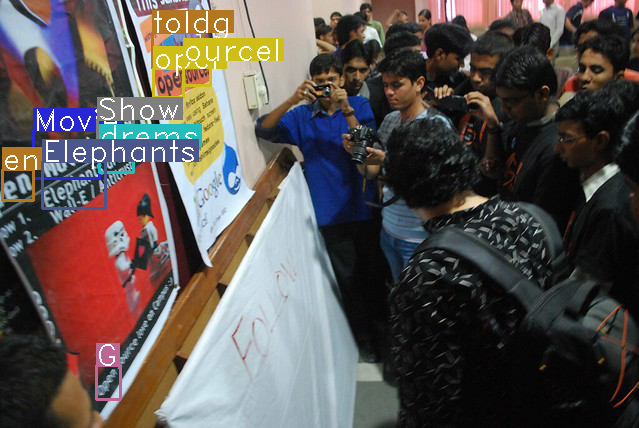




Data: 2717
Question: what percentage is the chocolate?
Answers: 45%,  100,  80%,  80,  80,  80,  80,  80,  3.5,  45
Predicted answer:  100  <-----
Prediction source: ['VOCAB']


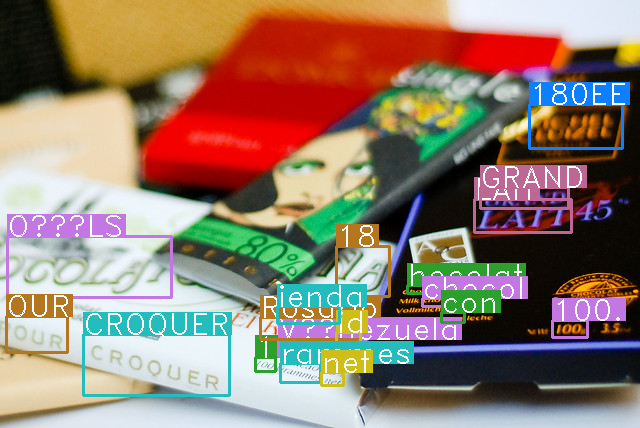




Data: 4009
Question: in what year was this artwork completed?
Answers: 1896,  1896,  1896,  1896,  1896,  1896,  1896,  1896,  1896,  1896
Predicted answer:  1896  <-----
Prediction source: ['OCR']


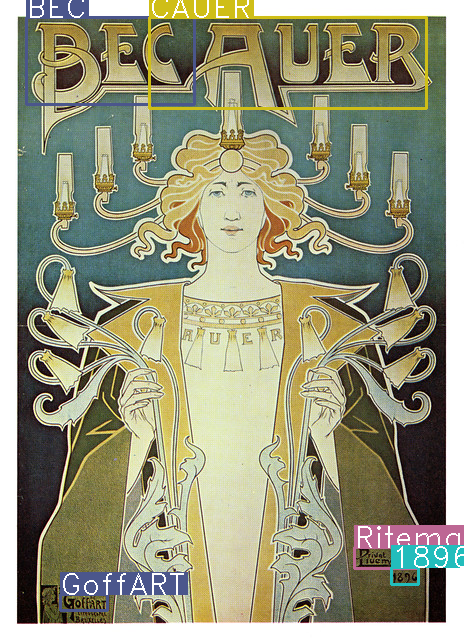




Data: 4975
Question: what is the name of this wine?
Answers: rubino del casale,  rubino del casale ,  rubino del casale ,  rubino,  rulino del casale,  vino da tavola rosso,  rubino del casale,  rubinode casale,  rubino del casale,  rubino del casale
Predicted answer:  san francisco  <-----
Prediction source: ['VOCAB', 'VOCAB']


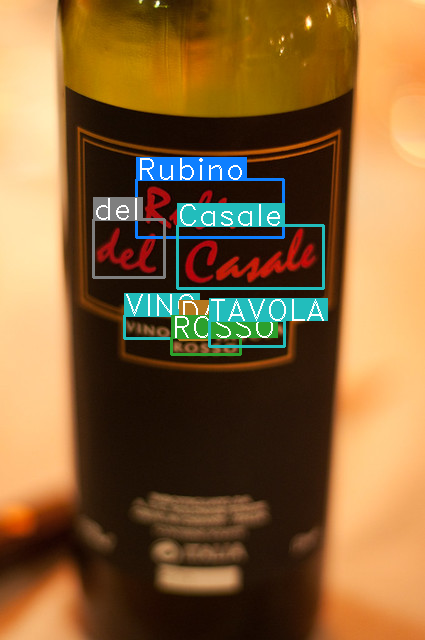




Data: 1626
Question: is she the number 2 player?
Answers: yes,  yes,  yes,  yes,  yes,  yes,  yes,  yes,  yes,  yes
Predicted answer:  yes  <-----
Prediction source: ['VOCAB']


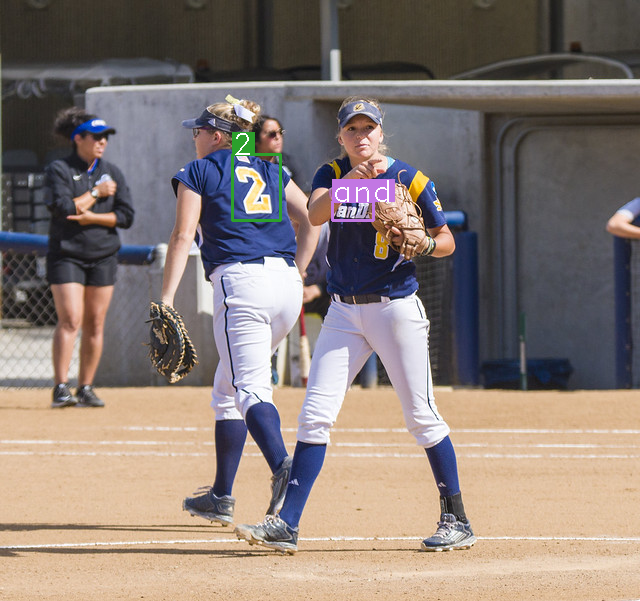

In [ ]:
dataset_size = len(valid_result)

for i in np.random.randint(0, dataset_size, 10):
    data = valid_result.iloc[i]
    print('Data:', i)

    visualize(data)
    #pprint(data)
    
    print('\n\n')

# Performance Evaluation

## Compute BLEU Score

In [ ]:
!pip install sacrebleu

     |████████████████████████████████| 71kB 3.6MB/s 


In [ ]:
import sacrebleu

In [ ]:
ground_truth = valid_result['answers'].values
ground_truth = np.stack(ground_truth).T

prediction   = valid_result['answer'].values

p,n = ground_truth.shape
print(f'{p} anwers for each question. We have {n} questions.')

10 anwers for each question. We have 5000 questions.


In [ ]:
bleu = sacrebleu.corpus_bleu(prediction, ground_truth)
print('BLUE Score:',bleu.score)

BLUE Score: 30.415668549005513


## Compute Accuracy of the prediction

In [ ]:
corrects = [ p in g for p,g in zip(prediction, ground_truth.T) ]
accuracy = np.sum(corrects) / len(corrects)

print('Accuracy:', accuracy*100)

Accuracy: 31.580000000000002


# Load Test Data

In [ ]:
test_data = pd.read_json('TextVQA_0.5_test.json')
test_data = pd.json_normalize(test_data['data'])
test_data.head()

# Load prediction on Test Data given by M4C

In [ ]:
# Mount drive

In [ ]:
path = '/content/drive/My Drive/projects/esther/TextVQA'
test_prediction = pd.read_json(path+'/m4c_textvqa_run_test_2020-06-05T12:35:31.json')
test_prediction.head() #39

In [ ]:
result = pd.merge(test_data, test_prediction, on=['image_id', 'question_id'])
result.head()

# Display results

In [ ]:
dataset_size = len(result)

for i in np.random.randint(0, dataset_size, 10):
    data = result.iloc[i]
    print('Data:', i)

    visualize(data)
    #pprint(data)
    
    print('\n\n')

## Google OCR

In [ ]:
def load_json_file(path):
    with open(path) as f:
        return json.load(f)

def get_google_ocr_sample(path, code):
    json_response = load_json_file(f'{path}/google_ocr_output_sample_{code}.json')
    request = load_json_file(f'{path}/google_ocr_request_sample_{code}.json')
    text_vqa_ocr_img = f'{path}/google_ocr_image_sample_{code}.png'
    img_url = request['requests'][0]['image']['source']['imageUri']
    return json_response, img_url, text_vqa_ocr_img

In [ ]:
path = '/content/drive/My Drive/projects/esther/google_ocr'

json_response, img_url, text_vqa_ocr_img = get_google_ocr_sample(path, code=1)

### google ocr visualizer

In [ ]:
len(json_response['responses'][0]['fullTextAnnotation']['pages'][0]['blocks'])

In [ ]:
len(json_response['responses'][0]['textAnnotations'])

In [ ]:
json_response['responses'][0]['textAnnotations'][0]

In [ ]:
from skimage import io
from matplotlib import cm

def visualize(json_response, image_url):
    try:
        image = io.imread(image_url)
    except:
        print('Image cannot be load')
        return

    textAnnotations = json_response['responses'][0]['textAnnotations']

    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    #image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)

    fontScale = 2
    fontFace  = cv2.FONT_HERSHEY_DUPLEX

    width, height, _ = image.shape
    for annotation in textAnnotations:
        boundingPoly = annotation['boundingPoly']['vertices'] #: [{'x': 193, 'y': 932},{'x': 193, 'y': 1723}]},
        detected_text = annotation['description'] #'POSTAGE 3¢\nU.S.\nGOD WE\nTRUST\nMillec\nMary\n103 Day Ave\nRoselle, Delinois\nLIBERT\nPfc Frances Millee\nSpecial Sevises Office\n24th Inf Div. Artilley\nA.P.O. 24-Unit 4\n',
        #locale = annotation['locale'] # 'en'

        color = cm.tab10(np.random.randint(10))
        color = 255 * np.array(color)
        color[3] = 125 

        #build polygon
        pts = [ (p['x'], p['y']) for p in boundingPoly ]
        pts = np.array(pts, np.int32)
        pts = pts.reshape((-1,1,2))

        # draw polygon
        cv2.polylines(image,[pts],True,color,thickness=2)

        # text background
        text_x = boundingPoly[0]['x']
        text_y = boundingPoly[0]['y']
        #text_width, text_height = cv2.getTextSize(detected_text, fontFace, fontScale, thickness=2)[0]
        #cv2.rectangle(image, (text_x,text_y), (text_x+text_width,text_y-text_height), color, cv2.FILLED)

        # put the text over the image 
        cv2.putText(image, detected_text, (text_x,text_y),
                    fontFace, fontScale,
                    color=color, thickness=2)
                    #color=(255,255,255), thickness=2)
    cv2_imshow(image)

In [ ]:
i=1
json_response, image_url, text_vqa_ocr_img = get_google_ocr_sample(path, code=i)
visualize(json_response, image_url)

image = cv2.imread(text_vqa_ocr_img)39
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2_imshow(image)

In [ ]:
i=2
json_response, image_url, text_vqa_ocr_img = get_google_ocr_sample(path, code=i)
visualize(json_response, image_url)

image = cv2.imread(text_vqa_ocr_img)
image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
cv2_imshow(image)

###TODO
1. understand the ouput from google ocr
2. understand how they use the ocr bounding box in M4C
3. lookfor a approach to improve M4C using the polygonal boxes from google ocr
4. get the ocr from google api for all the images





In [ ]:
!wget 'https://dl.fbaipublicfiles.com/textvqa/images/train_val_images.zip'

In [ ]:
# !rm -rf train_images/

In [ ]:
!unzip train_val_images.zip > /dev/null

In [ ]:
!wget 'https://dl.fbaipublicfiles.com/textvqa/images/test_images.zip'

In [ ]:
!unzip test_images.zip > /dev/null

In [ ]:
!gsutil -m cp -r -n ./test_images gs://textvqa_data

In [ ]:
!ls train_images/ | grep -i 003a8ae2ef43b901

In [ ]:
!gcloud auth login

In [ ]:
!gcloud config set project certain-ellipse-271308

In [ ]:
!mkdir ./train_images

In [ ]:
!gsutil -m cp -r -n gs://textvqa_ocr ./train_images

In [ ]:
!pip install -q --upgrade google-cloud-vision

In [ ]:
import os
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = '/content/drive/My Drive/projects/esther/google_ocr_credential.json'

In [ ]:
from google.cloud import vision_v1
from google.cloud.vision_v1 import enums

def sample_async_batch_annotate_images(images, output_uri="gs://your-bucket/prefix/"):
    """Perform async batch image annotation."""
    client = vision_v1.ImageAnnotatorClient()

    features = [
        {"type": enums.Feature.Type.TEXT_DETECTION},
    ]

    # Each requests element corresponds to a single image.  To annotate more
    # images, create a request element for each image and add it to
    # the array of requests
    requests = [{"image": {"source": {"image_uri": image}}, "features": features} for image in images]
    gcs_destination = {"uri": output_uri}

    # The max number of responses to output in each JSON file
    batch_size = len(images)
    output_config = {"gcs_destination": gcs_destination,
                     "batch_size": batch_size}

    operation = client.async_batch_annotate_images(requests, output_config)

    # print("Waiting for operation to complete...")
    # response = operation.result(90)

    # # The output is written to GCS with the provided output_uri as prefix
    # gcs_output_uri = response.output_config.gcs_destination.uri
    # print("Output written to GCS with prefix: {}".format(gcs_output_uri))


def batch_generate(data, batch_size = 2000):
    import pandas as pd

    image_dir      = 'test_images' if data == 'test' else 'train_images'
    filenames      = os.listdir('./'+image_dir)
    file_image_ids = [ fname[:-4] for fname in filenames]

    if data == 'test':
        df = pd.read_json(f'TextVQA_0.5_test.json')
        df = pd.json_normalize(df['data'])
        data_image_ids = df['image_id'].tolist()
        #print(df.head())
    else:
        df = pd.read_json(f'TextVQA_0.5_train.json')
        df = pd.json_normalize(df['data'])
        data_image_ids = df['image_id'].tolist()

        df = pd.read_json(f'TextVQA_0.5_val.json')
        df = pd.json_normalize(df['data'])
        data_image_ids += df['image_id'].tolist()

    #exception
    exception = list(set(file_image_ids) - set(data_image_ids))
    print('exception:', len(exception),
          'data_image_ids:', len(set(data_image_ids)),
          'file_image_ids:', len(set(file_image_ids)))

    #look for the uniques
    image_ids = file_image_ids #list(set(image_ids))
    n = len(image_ids)

    print(n, ' images found.')
    print(image_ids[:5])

    i = 0
    while i<n:
        end = i + batch_size
        if end > n: end = n
        
        batch_image_uri = [f"gs://textvqa_data/{image_dir}/{id}" for id in filenames[i:end]] # .jpg
        output_uri      = f"gs://textvqa_ocr/json/{data}/{i}/"

        print(f'\nchunk {i}-{end} ({len(batch_image_uri)}): {batch_image_uri[0]} ...')
        #sample_async_batch_annotate_images_(batch_image_uri, output_uri)
        
        if batch_size<10 and i>10: break # for debug
        i += batch_size


In [ ]:
for data in 'test', 'train':
    print('\n--------------\nGenerate for:', data)
    batch_generate(data, batch_size = 100)

# !gsutil -m cp -r -n gs://textvqa_ocr ./train_imagesConvert Google OCR to Text VQA Json

In [ ]:
!gcloud auth login

In [ ]:
!gcloud config set project certain-ellipse-271308

In [ ]:
!mkdir /content/drive/My\ Drive/projects/esther/textvqa_ocr

In [ ]:
!gsutil -m cp -r -n gs://textvqa_ocr /content/drive/My\ Drive/projects/esther/textvqa_ocr

In [ ]:
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_test.json
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_val.json
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_train.json

In [ ]:
import glob

json_files = glob.glob('/content/drive/My Drive/projects/esther/textvqa_ocr/textvqa_ocr/json/**/*.json', recursive=True)
json_files[0]

In [ ]:
# train['responses'][0]['textAnnotations'][0]

In [ ]:
# train['responses'][0]

In [ ]:
import json

def get_info(response, max_token_len=50):
    uri = response['context']['uri']

    dataset = uri.split('/')[-2]
    imagefile = uri.split('/')[-1]
    image_id = imagefile.split('.')[0]

    textAnnotations = response['textAnnotations']

    image_width  = response['fullTextAnnotation']['pages'][0]['width']
    image_height = response['fullTextAnnotation']['pages'][0]['height']

    ocr_info   = []
    ocr_tokens = []

    for textAnnotation in textAnnotations:
        # print('===============')
        # print(textAnnotation)
        token    = textAnnotation['description']
        vertices = textAnnotation['boundingPoly']['vertices']

        if len(token) > max_token_len or len(token.split('\n'))>1:
            continue

        x_min, y_min, x_max, y_max = float('inf'), float('inf'), 0, 0
        for vertice in vertices:
            if 'x' in vertice:
                if x_min > vertice['x']: x_min = vertice['x']
                if x_max < vertice['x']: x_max = vertice['x']

            if 'y' in vertice:
                if y_min > vertice['y']: y_min = vertice['y']
                if y_max < vertice['y']: y_max = vertice['y']

        ocr_tokens.append(token)
        ocr_info.append({
            'bounding_box': {
                'pitch': 0,
                'roll': 0,
                'rotation': 0,
                'top_left_x': x_min,
                'top_left_y': y_min,
                'width':      x_max - x_min,
                'height':     y_max - y_min,
                'yaw': 0},
            'word': token})
    
    return { 
        'dataset'    : dataset, 
        'imagefile'  : imagefile, 
        'image_id'   : image_id, 
        'ocr_tokens' : ocr_tokens, 
        'ocr_info'   : ocr_info,
        'image_width' : image_width,
        'image_height' : image_height,
    }


with open(json_files[0]) as f:
    test_json = json.load(f)

info = get_info(test_json['responses'][0], 50)
info

In [ ]:
#test_json['responses'][0]

In [ ]:
import numpy as np
import json

path = '/content/drive/My Drive/projects/esther/TextVQA'
train_file = path + '/TextVQA_0.5_train.json'
valid_file = path + '/TextVQA_0.5_val.json'
test_file  = path + '/TextVQA_0.5_test.json'

with open(train_file) as f:
    train = json.load(f)
with open(valid_file) as f:
    valid = json.load(f)
with open(test_file) as f:
    test = json.load(f)

In [ ]:
import glob

tmp_info    = None
tmp_reponse = None

google_ocrs = {}
for json_file in json_files:
    with open(json_file) as f:
        data_json = json.load(f)
        for response in data_json['responses']:
            try:
                info = get_info(response, max_token_len=50)
                google_ocrs[info['image_id']] = info
                # google_ocrs.append(info)
                if info['image_id'] == '003a8ae2ef43b901':
                    tmp_reponse = response
                    tmp_info    = info
            except:
                #print('response:', response)
                pass

In [ ]:
# tmp_info

In [ ]:
# tmp_reponse

In [ ]:
# !gsutil cp gs://textvqa_data/train_images/fee949a9845570cd.jpg bad_images

In [ ]:
import pandas as pd

test_data  = pd.read_json(path + '/TextVQA_0.5_test.json')
test_data  = pd.json_normalize(test_data['data'])

valid_data = pd.read_json(path + '/TextVQA_0.5_val.json')
valid_data = pd.json_normalize(valid_data['data'])

train_data = pd.read_json(path + '/TextVQA_0.5_train.json')
train_data = pd.json_normalize(train_data['data'])

In [ ]:
valid_data.head(2)

In [ ]:
# {
#     'dataset':dataset, 
#     'imagefile':imagefile, 
#     'image_id':image_id, 
#     'ocr_tokens':ocr_tokens, 
#     'ocr_info':ocr_info
# }

# TextVQA_0.5_test.json, TextVQA_0.5_val.json

# for data in [test_data, valid_data, train_data]:

def normalize_ocr_boxes(row):
    image_id   = row['image_id']
    if image_id not in google_ocrs:
        return row
    ocr_tokens = google_ocrs[image_id]['ocr_tokens']
    ocr_info   = google_ocrs[image_id]['ocr_info']
    # print('image_id:', image_id)
    # print('=====================')

    image_width  = row['image_width']
    image_height = row['image_height']
    # print('>>', image_width, image_height)

    # image_width  = google_ocrs[image_id]['image_width']
    # image_height = google_ocrs[image_id]['image_height']
    # print('>>', image_width, image_height)

    # normalize bounding boxes
    ocr_info_normalized = []
    for ocr in ocr_info:
        # print('ocr:', ocr)
        ocr = ocr.copy()
        ocr['bounding_box']['top_left_x'] /= image_width
        ocr['bounding_box']['top_left_y'] /= image_height
        ocr['bounding_box']['width']      /= image_width
        ocr['bounding_box']['height']     /= image_height
        ocr_info_normalized.append(ocr)
    
    # if 'ocr' in ocr_info:
    row['ocr_info']   = ocr_info_normalized
    row['ocr_tokens'] = google_ocr['ocr_tokens']

    return row

# normalize_ocr_boxes(valid_data.iloc[0])['ocr_info']

In [ ]:
# google_ocrs['003a8ae2ef43b901']

In [ ]:
# valid_data.iloc[0]['ocr_info']

data_frames = {
    "valid" : valid_data,
    "train" : train_data,
    "test"  : test_data,
}

In [ ]:
data_goog = {}
for key, df in data_frames.items():
    data_goog[key] = df.apply(normalize_ocr_boxes, axis=1)

In [ ]:
#save json file
path = '/content/drive/My Drive/projects/esther/TextVQA_goog_ocr'
for key, df in data_goog.items():
    json_str = df.to_json(orient="records")
    json_str = '{"data":' + json_str + '}'

    json_file = open(f"{path}/TextVQA_0.5_{key}_goog.json", "w")
    json_file.write(json_str)
    json_file.close()

In [ ]:
valid_data.head(2)

In [ ]:
valid_data.iloc[0]['ocr_info']

In [ ]:
image_width   1024
image_height   664

In [ ]:
ocr_tokens = [DAKOTA, DIGITAL, Single-Use, Camera, digrtal]
ocr_info = {'bounding_box': {'height': 0.071707926690578,
  'pitch': 0,
  'roll': 0,
  'rotation': 0,
  'top_left_x': 0.14370192587376,
  'top_left_y': 0.1531290858984,
  'width': 0.12223755568266,
  'yaw': 0.92349565029144},
 'word': 'DAKOTA'}

# Test OCR

In [ ]:
!pip install easyocr

In [ ]:
import easyocr
reader = easyocr.Reader(['en'])

In [ ]:
reader.readtext('img170.jpg')

In [ ]:
reader.readtext('img171.jpg')

In [ ]:
reader.readtext('img172.jpg')

In [ ]:
#understand file structure

In [ ]:
valid_data.iloc[0]

In [ ]:
valid_data.iloc[0]['ocr_info'][0]

## m4c generate imdb file

In [ ]:
save_path = '/content/drive/My Drive/projects/esther/preprocessing'

In [ ]:
!wget https://dl.fbaipublicfiles.com/textvqa/images/test_images.zip
!unzip test_images.zip > /dev/null

In [ ]:
!wget https://dl.fbaipublicfiles.com/textvqa/images/train_val_images.zip
!unzip train_val_images.zip > /dev/null

In [ ]:
#download data
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_test.json
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_val.json
!wget https://dl.fbaipublicfiles.com/textvqa/data/TextVQA_0.5_train.json

In [ ]:
#generator script
import numpy as np
import json
from tqdm.notebook import tqdm

#stvqa_train_file = '/private/home/ronghanghu/workspace/DATASETS/ST-VQA/annotations/train_task_3.json'

# train_file = './TextVQA_0.5_train.json'
# valid_file = './TextVQA_0.5_val.json'
# test_file = './TextVQA_0.5_test.json'

path = '/content/drive/My Drive/projects/esther/TextVQA_goog_ocr'
train_file = f'{path}/TextVQA_0.5_train_goog.json'
valid_file = f'{path}/TextVQA_0.5_valid_goog.json'
test_file  = f'{path}/TextVQA_0.5_test_goog.json'

with open(train_file) as f:
    train = json.load(f)
with open(valid_file) as f:
    valid = json.load(f)
with open(test_file) as f:
    test = json.load(f)

# # load OCR results
# with open('../data/stvqa_cortex_ocr_eng_only/stvqa_cortex_ocr_eng_only_all.json') as f:
#     stvqa_all_ocrs = json.load(f)

# # load object detection results
# stvqa_train_objects_path = '/checkpoint/ronghanghu/misc/stvqa_fc6/train/%s_info.npy'
# stvqa_test_objects_path = '/checkpoint/ronghanghu/misc/stvqa_fc6/test_task3/%s_info.npy'

imdb_head = {'creation_time': '2019-10-17'}
stvqa_train_imdb = [imdb_head]
# for n_d, d in tqdm(enumerate(valid['data'])):# + test['data'])):
for n_d, d in tqdm(enumerate(test['data'] + valid['data'] + train['data'])):
# for n_d, d in tqdm(enumerate(test['data'])):

    set_name  = d['set_name']
    image_id = d['image_id']
    if set_name == 'train':
        image_path   = f'./train_images/{image_id}.jpg'
        feature_path = f'./train/{image_id}.npy'
    if set_name == 'val':
        image_path = f'./train_images/{image_id}.jpg'
        feature_path = f'./val/{image_id}.npy'
    if set_name == 'test':
        image_path = f'./test_images/{image_id}.jpg'
        feature_path = f'./test/{image_id}.npy'

    w, h = d['image_width'], d['image_height']
    # objects_info = np.load(
    #     stvqa_train_objects_path % d['file_path'].replace('.jpg', '').replace('.JPEG', ''),
    #     allow_pickle=True)[()]
    # ocr_info = stvqa_all_ocrs['train/'+d['file_path']]

    ocr_boxes = []
    for b in d['ocr_info']:
        b = b['bounding_box']
        #print('b:',b)
        x1 = b['top_left_x']
        y1 = b['top_left_y']
        x2 = x1 + b['width']
        y2 = y1 + b['height']
        ocr_boxes.append([x1, y1, x2, y2])

    if set_name == 'test':
        tiled_answers = None
    else:
        tiled_answers = [a.lower() for a in d['answers']]
        # if len(tiled_answers) == 1:
        #     tiled_answers = tiled_answers * 2
        # tiled_answers = tiled_answers * 5
        tiled_answers = tiled_answers[:10]
        assert len(tiled_answers) == 10

    entry = {
        # basic image info
            # 'image_name': d['file_name'],
            # 'image_path': d['file_path'],
        'image_name': d['image_id'] + '.jpg',
        'image_path': image_path,
        'image_width': w,
        'image_height': h,
            ## usefull only for stvqa and coco
            # 'feature_path': d['file_path'].replace('.jpg', '.npy').replace('.JPEG', '.npy'),
            'feature_path': feature_path,
        'image_id': d['image_id'], # 10000000+n_d
        # dummy question and answer info
        'question': d['question'],
        'question_id': d['question_id'], # 10000000+d['question_id'],
        'question_tokens': [t.lower() for t in d['question_tokens']],
        'valid_answers': tiled_answers,
        'answers': tiled_answers,
        ## OCR information
            # 'ocr_tokens': [t for t in ocr_info['ocr_tokens']],
            # 'ocr_info': ocr_info['ocr_info'],
            # 'ocr_normalized_boxes': 
            #     np.array(ocr_info['ocr_normalized_boxes']).reshape(-1, 4).astype(np.float32),
        'ocr_tokens': [t for t in d['ocr_tokens']],
        'ocr_info': d['ocr_info'],
        'ocr_normalized_boxes': np.array(ocr_boxes).astype(np.float32),
        ## information about detected objects
            # 'obj_normalized_boxes':
            #     (objects_info['bbox'] / [w, h, w, h]).astype(np.float32),
            # 'obj_classes': objects_info['objects'],
        ## useless
        'obj_normalized_boxes': np.array([[0,0,0,0]]).astype(np.float32),
        'obj_classes': [0],
    }
    stvqa_train_imdb.append(entry)


# feature_path ## useless here
# image_id
# image_path
# obj_normalized_boxes
# ocr_info
# ocr_normalized_boxes
# ocr_tokens
# question
# question_id
# question_str ## by default they will use "question" is this is not available
# question_tokens

np.save('./imdb_trainval.npy', stvqa_train_imdb)

# Generate feature

In [ ]:
# !pip install --upgrade --pre mmf

In [ ]:
# !git clone https://github.com/facebookresearch/mmf
# !cd mmf && pip install --editable .

In [ ]:
#pip install ninja yacs cython matplotlib opencv-python
# !pip install yacs

In [ ]:
!git clone https://github.com/ronghanghu/vqa-maskrcnn-benchmark-m4c
!cd vqa-maskrcnn-benchmark-m4c && pip install --editable .
# !pip install git+https://github.com/ronghanghu/vqa-maskrcnn-benchmark-m4c

#restart runtime

In [ ]:
# !wget https://github.com/facebookresearch/mmf/files/4699404/stvqa_build_imdb.py.zip
# !unzip stvqa_build_imdb.py.zip > /dev/null

In [ ]:
# !cd /content/mmf/projects/m4c/scripts/ && python extract_ocr_frcn_feature.py --help

In [ ]:
!wget "https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model.yaml"
!wget "https://dl.fbaipublicfiles.com/pythia/detectron_model/detectron_model.pth"

In [ ]:
!pip install yacs
#!pip show ninja yacs #cython matplotlib tqdm

In [ ]:
# Copyright (c) Facebook, Inc. and its affiliates.

# install `vqa-maskrcnn-benchmark` from
# https://github.com/ronghanghu/vqa-maskrcnn-benchmark-m4c
import argparse
import os
import sys

import cv2
import numpy as np
import torch
from tqdm.notebook import tqdm
from maskrcnn_benchmark.config import cfg
from maskrcnn_benchmark.layers import nms
from maskrcnn_benchmark.modeling.detector import build_detection_model
from maskrcnn_benchmark.structures.image_list import to_image_list
from maskrcnn_benchmark.utils.model_serialization import load_state_dict
from PIL import Image

sys.path.append("/content/vqa-maskrcnn-benchmark-m4c")  # NoQA


def load_detection_model(yaml_file, yaml_ckpt):
    cfg.merge_from_file(yaml_file)
    cfg.freeze()

    model = build_detection_model(cfg)
    checkpoint = torch.load(yaml_ckpt, map_location=torch.device("cpu"))

    load_state_dict(model, checkpoint.pop("model"))

    model.to("cuda")
    model.eval()
    return model


def _image_transform(image_path):
    img = Image.open(image_path)
    im = np.array(img).astype(np.float32)
    # handle a few corner cases
    if im.ndim == 2:  # gray => RGB
        im = np.tile(im[:, :, None], (1, 1, 3))
    if im.shape[2] > 3:  # RGBA => RGB
        im = im[:, :, :3]

    im = im[:, :, ::-1]  # RGB => BGR
    im -= np.array([102.9801, 115.9465, 122.7717])
    im_shape = im.shape
    im_size_min = np.min(im_shape[0:2])
    im_size_max = np.max(im_shape[0:2])
    im_scale = float(800) / float(im_size_min)
    # Prevent the biggest axis from being more than max_size
    if np.round(im_scale * im_size_max) > 1333:
        im_scale = float(1333) / float(im_size_max)
    im = cv2.resize(
        im, None, None, fx=im_scale, fy=im_scale, interpolation=cv2.INTER_LINEAR
    )
    img = torch.from_numpy(im).permute(2, 0, 1)
    return img, im_scale


def _process_feature_extraction(output, im_scales, feat_name="fc6"):
    batch_size = len(output[0]["proposals"])
    n_boxes_per_image = [len(_) for _ in output[0]["proposals"]]
    score_list = output[0]["scores"].split(n_boxes_per_image)
    score_list = [torch.nn.functional.softmax(x, -1) for x in score_list]
    feats = output[0][feat_name].split(n_boxes_per_image)
    cur_device = score_list[0].device

    feat_list = []
    bbox_list = []

    for i in range(batch_size):
        dets = output[0]["proposals"][i].bbox / im_scales[i]
        scores = score_list[i]

        max_conf = torch.zeros(scores.shape[0]).to(cur_device)

        for cls_ind in range(1, scores.shape[1]):
            cls_scores = scores[:, cls_ind]
            keep = nms(dets, cls_scores, 0.5)
            max_conf[keep] = torch.where(
                cls_scores[keep] > max_conf[keep], cls_scores[keep], max_conf[keep]
            )

        keep_boxes = torch.argsort(max_conf, descending=True)[:100]
        feat_list.append(feats[i][keep_boxes])
        bbox_list.append(output[0]["proposals"][i].bbox[keep_boxes])
    return feat_list, bbox_list


def extract_features(detection_model, image_path, input_boxes=None, feat_name="fc6"):
    im, im_scale = _image_transform(image_path)
    if input_boxes is not None:
        if isinstance(input_boxes, np.ndarray):
            input_boxes = torch.from_numpy(input_boxes.copy())
        input_boxes *= im_scale
    img_tensor, im_scales = [im], [im_scale]
    current_img_list = to_image_list(img_tensor, size_divisible=32)
    current_img_list = current_img_list.to("cuda")
    with torch.no_grad():
        output = detection_model(current_img_list, input_boxes=input_boxes)

    if input_boxes is None:
        feat_list, bbox_list = _process_feature_extraction(output, im_scales, feat_name)
        feat = feat_list[0].cpu().numpy()
        bbox = bbox_list[0].cpu().numpy() / im_scale
    else:
        feat = output[0][feat_name].cpu().numpy()
        bbox = output[0]["proposals"][0].bbox.cpu().numpy() / im_scale

    return feat, bbox


def main():
    # parser = argparse.ArgumentParser()
    # parser.add_argument(
    #     "--detection_cfg",
    #     type=str,
    #     default="/private/home/ronghanghu/workspace/pythia/data/"
    #     + "frcn_feature_extraction/detectron_model.yaml",
    #     help="Detectron config file; download it from "
    #     + "https://dl.fbaipublicfiles.com/pythia/detectron_model/"
    #     + "detectron_model.yaml",
    # )
    # parser.add_argument(
    #     "--detection_model",
    #     type=str,
    #     default="/private/home/ronghanghu/workspace/pythia/data/"
    #     + "frcn_feature_extraction/detectron_model.pth",
    #     help="Detectron model file; download it"
    #     + " from https://dl.fbaipublicfiles.com/pythia/detectron_model/"
    #     + "detectron_model.pth",
    # )
    # parser.add_argument(
    #     "--imdb_file",
    #     type=str,
    #     default="/private/home/ronghanghu/workspace/pythia/data/"
    #     + "imdb/m4c_textvqa/imdb_train_ocr_en.npy",
    #     help="The imdb to extract features",
    # )
    # parser.add_argument(
    #     "--image_dir",
    #     type=str,
    #     default="/private/home/ronghanghu/workspace/DATASETS/TextVQA",
    #     help="The directory containing images",
    # )
    # parser.add_argument(
    #     "--save_dir",
    #     type=str,
    #     default="/private/home/ronghanghu/workspace/pythia/data/"
    #     + "m4c_textvqa_ocr_en_frcn_features_2/train_images",
    #     help="The directory to save extracted features",
    # )
    # args = parser.parse_args()

    # DETECTION_YAML = args.detection_cfg
    # DETECTION_CKPT = args.detection_model
    # IMDB_FILE = args.imdb_file
    # IMAGE_DIR = args.image_dir
    # SAVE_DIR = args.save_dir

    DETECTION_YAML = "./detectron_model.yaml"
    DETECTION_CKPT = "./detectron_model.pth"
    IMDB_FILE      = "./imdb_trainval.npy"
    IMAGE_DIR      = "."
    save_path = '/content/drive/My Drive/projects/esther'
    SAVE_DIR       = save_path+"/save_dir_goog"

    os.makedirs(SAVE_DIR, exist_ok=True)

    imdb = np.load(IMDB_FILE, allow_pickle=True)[1:]
    # keep only one entry per image_id
    image_id2info = {info["image_id"]: info for info in imdb}
    imdb = list(image_id2info[k] for k in sorted(image_id2info))

    detection_model = load_detection_model(DETECTION_YAML, DETECTION_CKPT)
    print("Faster R-CNN OCR features")
    print("\textracting from", IMDB_FILE)
    print("\tsaving to", SAVE_DIR)
    for i, info in enumerate(tqdm(imdb)):
        # if i > 50:
        #     break
        image_path = os.path.join(IMAGE_DIR, info["image_path"])
        save_feat_path = os.path.join(SAVE_DIR, info["feature_path"])
        save_info_path = save_feat_path.replace(".npy", "_info.npy")
        os.makedirs(os.path.dirname(save_feat_path), exist_ok=True)

        if os.path.isfile(save_feat_path):
            continue

        w = info["image_width"]
        h = info["image_height"]
        ocr_normalized_boxes = np.array(info["ocr_normalized_boxes"])
        ocr_boxes = ocr_normalized_boxes.reshape(-1, 4) * [w, h, w, h]
        ocr_tokens = info["ocr_tokens"]
        if len(ocr_boxes) > 0:
            extracted_feat, _ = extract_features(
                detection_model, image_path, input_boxes=ocr_boxes
            )
        else:
            extracted_feat = np.zeros((0, 2048), np.float32)

        # np.save(save_info_path, {"ocr_boxes": ocr_boxes, "ocr_tokens": ocr_tokens})

        # print('info ',i, ':', info)
        np.save(save_info_path, info)
        np.save(save_feat_path, extracted_feat)

if __name__ == "__main__":
    main()

In [ ]:
!ls -lah '/content/drive/My Drive/projects/esther/save_dir_goog/./train/0000599864fd15b3_info.npy'

In [ ]:
!pip install lmdb

In [ ]:
save_path = '/content/drive/My Drive/projects/esther'

In [ ]:
!ls '$save_path/save_dir_goog'

In [ ]:
id_list = []

In [ ]:
# Copyright (c) Facebook, Inc. and its affiliates.

import argparse
import glob
import os
import pickle

import lmdb
import numpy as np
# import tqdm
from tqdm.notebook import tqdm


class LMDBConversion:
    def __init__(self, mode='convert'):
        # self.args = self.get_parser().parse_args()
        self.lmdb_path       = save_path+'/lmdb_path_goog'
        self.features_folder = save_path+'/save_dir_goog'
        self.mode            = mode
        #self.mode            = 'convert'
        #self.mode            = 'extract'

    def get_parser(self):
        parser = argparse.ArgumentParser(formatter_class=argparse.RawTextHelpFormatter)

        parser.add_argument(
            "--mode",
            required=True,
            type=str,
            help="Mode can either be `convert` (for conversion of \n"
            + "features to an LMDB file) or `extract` (extract \n"
            + "raw features from a LMDB file)",
        )
        parser.add_argument(
            "--lmdb_path", required=True, type=str, help="LMDB file path"
        )
        parser.add_argument(
            "--features_folder", required=True, type=str, help="Features folder"
        )
        return parser
        # 0000599864fd15b3
    def convert(self):
        env = lmdb.open(self.lmdb_path, map_size=1099511627776)
        id_list = []
        all_features = glob.glob(
            #os.path.join(self.args.features_folder, "**", "*.npy"), recursive=True
            os.path.join(self.features_folder, "**", "*.npy"), recursive=True
        )

        features = []
        for feature in all_features:
            if not feature.endswith("_info.npy"):
                features.append(feature)

        with env.begin(write=True) as txn:
            for infile in tqdm(features):
                #reader = np.load(infile, allow_pickle=True)
                item = {}
                split = os.path.relpath(infile, self.features_folder).split(
                    ".npy"
                )[0]
                # split.replace('val/', 'test/')
                item["feature_path"] = split
                key = split.encode()
                # id_list.append(key)
                id_list.append(split)
                # print('key:', key, ' - split:',split)
                continue

                item["features"] = reader
                info_file = infile.split(".npy")[0] + "_info.npy"
                if not os.path.isfile(info_file):
                    txn.put(key, pickle.dumps(item))
                    continue

                reader = np.load(info_file, allow_pickle=True)
                # print('reader:', reader)
                imdb_field_keys = ["image_id", "image_path", "obj_normalized_boxes", "ocr_info", "ocr_normalized_boxes", "ocr_tokens", "question", "question_id", "question_str", "question_tokens"] #"feature_path"
                for field_key in imdb_field_keys:
                    item[field_key] = reader.item().get(field_key)
                # item["ocr_boxes"] = reader.item().get("ocr_boxes")
                # item["ocr_tokens"] = reader.item().get("ocr_tokens")

                txn.put(key, pickle.dumps(item))

            txn.put(b"keys", pickle.dumps(id_list))
        return id_list

    def extract(self):
        # raise NotImplementedError()
        # os.makedirs(self.args.features_folder, exist_ok=True)
        os.makedirs(self.features_folder, exist_ok=True)
        env = lmdb.open(
            # self.args.lmdb_path,
            self.lmdb_path,
            max_readers=1,
            readonly=True,
            lock=False,
            readahead=False,
            meminit=False,
        )
        with env.begin(write=False) as txn:
            _image_ids = pickle.loads(txn.get(b"keys"))
            print('len(_image_ids):',len(_image_ids))
            for img_id in tqdm.tqdm(_image_ids):
                item = pickle.loads(txn.get(img_id))
                img_id = img_id.decode("utf-8")
                tmp_dict = {}
                # tmp_dict["image_id"] = img_id
                # tmp_dict["bbox"] = item["bbox"]
                # tmp_dict["num_boxes"] = item["num_boxes"]
                # tmp_dict["image_height"] = item["image_width"]
                # tmp_dict["image_width"] = item["image_width"]
                # tmp_dict["objects"] = item["objects"]
                # tmp_dict["cls_prob"] = item["cls_prob"]

                # print('img_id:',img_id)
                # print('keys:', item.keys())
                tmp_dict["feature_path"] = item['feature_path']
                tmp_dict["image_id"] = item['image_id']
                tmp_dict["image_path"] = item['image_path']
                tmp_dict["obj_normalized_boxes"] = item['obj_normalized_boxes']
                tmp_dict["ocr_info"] = item['ocr_info']
                tmp_dict["ocr_normalized_boxes"] = item['ocr_normalized_boxes']
                tmp_dict["ocr_tokens"] = item['ocr_tokens']
                tmp_dict["question"] = item['question']
                tmp_dict["question_id"] = item['question_id']
                tmp_dict["question_str"] = item['question_str']
                tmp_dict["question_tokens"] = item['question_tokens']

                info_file_base_name = str(img_id) + "_info.npy"
                file_base_name = str(img_id) + ".npy"

                np.save(
                    # os.path.join(self.args.features_folder, file_base_name),
                    os.path.join(self.features_folder, file_base_name),
                    item["features"],
                )
                np.save(
                    # os.path.join(self.args.features_folder, info_file_base_nam0000599864fd15b3e),
                    os.path.join(self.features_folder, info_file_base_name),
                    tmp_dict,
                )

    def execute(self):
        if self.mode == "convert":
            return self.convert()
        elif self.mode == "extract":
            self.extract()
        else:
            raise ValueError("mode must be either `convert` or `extract` ")


if __name__ == "__main__":
    lmdb_converter = LMDBConversion('convert')
    #lmdb_converter = LMDBConversion('extract')
    id_list = lmdb_converter.execute()

In [ ]:
len(id_list), id_list[0]

In [ ]:
head = 'train'
for i, key in enumerate(id_list):
    if key.find('003a8ae2ef43b901') > -1:
        print(i, ':', key, ' - find it')
    if not key.startswith(head):
        print(i, ':', key)
        head = key[0:3]

In [ ]:
head.find('z')

In [ ]:
#!cp -R /content/lmdb_path /content/drive/My\ Drive/projects/esther

In [ ]:
# !rm -rf /content/save_dir 

In [ ]:
# %load_ext google.colab.data_table
# from vega_datasets import data
# data.airports()

In [ ]:
!mmf_run dataset=textvqa \
  model=m4c \
  config=projects/m4c/configs/textvqa/defaults.yaml \
  env.save_dir=./save/m4c \
  run_type=val \
  checkpoint.resume_zoo=m4c.textvqa.with_stvqa

In [ ]:
!mmf_run dataset=textvqa model=m4c config=projects/m4c/configs/textvqa/defaults.yaml env.save_dir=./save/m4c run_type=val checkpoint.resume_zoo=m4c.textvqa.with_stvqa


In [ ]:
mmf_run dataset=textvqa \
  model=m4c \
  config=projects/m4c/configs/textvqa/defaults.yaml \
  env.save_dir=./save/m4c

mmf_run dataset=textvqa model=m4c config=projects/m4c/configs/textvqa/defaults.yaml env.save_dir=./save/m4c